# Basics of Returns (수익률)

- 가격(Prices)의 수익률(Returns) 변환

- 수익률 계산 및 수익률 시퀀스를 복리화

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import FinanceDataReader as fdr

## 1. Simple Returns (단순 수익률)

$t$ 시간에서 ${t+1}$ 시간까지의 Return은 다음과 같이 계산됩니다. 나중가격  / 이전가격 - 1

$$ R_{t,t+1} = \frac{P_{t+1}-P_{t}}{P_{t}} = \frac{P_{t+1}}{P_{t}} - 1 $$


주식 a 의 3일간의 가격 변화

In [2]:
prices_a = np.array([8.70, 8.91, 8.71])
prices_a

array([8.7 , 8.91, 8.71])

주식 a의 일일 수익률

In [3]:
# 가격(prices_a)의 일일 수익률을 계산
# prices_a[1:]는 두 번째 데이터부터 마지막 데이터까지를 나타내고,
# prices_a[:-1]는 첫 번째 데이터부터 마지막 전 데이터까지를 나타냅니다.
# 두 데이터를 사용하여 일일 수익률을 계산합니다.
(prices_a[1:] - prices_a[:-1]) / prices_a[:-1]

array([ 0.02413793, -0.02244669])

In [4]:
# 가격(prices_a)의 일일 수익률을 계산
# prices_a[1:]는 두 번째 데이터부터 마지막 데이터까지를 나타내고,
# prices_a[:-1]는 첫 번째 데이터부터 마지막 전 데이터까지를 나타냅니다.
# 각 날짜의 수익률은 (다음 날 가격 / 이전 날 가격) - 1로 계산됩니다.
returns = prices_a[1:] / prices_a[:-1] - 1

returns

array([ 0.02413793, -0.02244669])

이제 가격을 며칠 더 추가하고 두 번째 주식을 소개합니다. 이 두 주식을 "BLUE"와 "ORANGE"라고 부르고 Pandas DataFrame을 사용하여 다음과 같이 표시합니다.

In [5]:
prices = pd.DataFrame({"BLUE": [8.70, 8.91, 8.71, 8.43, 8.73],
                       "ORANGE": [10.66, 11.08, 10.71, 11.59, 12.11]})
prices

,BLUE,ORANGE
0,8.70,10.66
1,8.91,11.08
2,8.71,10.71
3,8.43,11.59
4,8.73,12.11


- 일일 수익률 계산 
$$ R_{t,t+1} = \frac{P_{t+1}-P_{t}}{P_{t}} = \frac{P_{t+1}}{P_{t}} - 1 $$

In [6]:
# pandas 데이터프레임에서 일일 수익률을 계산
# prices.iloc[1:]는 두 번째 행부터 마지막 행까지를 나타내고,
# prices.iloc[:-1]는 첫 번째 행부터 마지막 전 행까지를 나타냅니다.
# 각 날짜의 수익률은 (다음 날 가격 / 이전 날 가격) - 1로 계산됩니다.
prices.iloc[1:] / prices.iloc[:-1].values - 1

,BLUE,ORANGE
1,0.024138,0.039400
2,-0.022447,-0.033394
3,-0.032147,0.082166
4,0.035587,0.044866


위와 동일한 결과를  `.shift()` 메서드를 이용하여 쉽게 구할 수 있습니다.   

In [7]:
returns = prices / prices.shift(1) - 1
returns

,BLUE,ORANGE
0,NaN,NaN
1,0.024138,0.039400
2,-0.022447,-0.033394
3,-0.032147,0.082166
4,0.035587,0.044866


- 전날의 종가가 없기 때문에 첫날의 수익을 계산할 수 없다는 점에 유의 

- 일반적으로 가격에서 수익으로 이동할 때 하나의 데이터 포인트를 잃음

- DataFrame에는 한 행에서 다른 행으로의 백분율 변경을 계산하는 기본 제공 메서드가 있습니다. 이 방법을 사용하여 수익률을 위의 방법보다 더 쉽게 계산할 수 있습니다.

In [8]:
returns = prices.pct_change()
returns

,BLUE,ORANGE
0,NaN,NaN
1,0.024138,0.039400
2,-0.022447,-0.033394
3,-0.032147,0.082166
4,0.035587,0.044866


### 수익률 평균, 표준편차
- 12 개월 가격

In [9]:
prices = pd.read_csv('data/sample_prices.csv')
prices

,BLUE,ORANGE
0,8.7000,10.6600
1,8.9055,11.0828
2,8.7113,10.7100
3,8.4346,11.5907
4,8.7254,12.1070
5,9.0551,11.7876
6,8.9514,11.2078
7,9.2439,12.5192
8,9.1276,13.3624
9,9.3976,14.4080


- 월별 수익률

In [10]:
returns = prices.pct_change()
returns

,BLUE,ORANGE
0,NaN,NaN
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249


- 평균 수익률

In [11]:
returns.mean()

BLUE      0.01
ORANGE    0.01
dtype: float64

- 수익률 표준 편차

In [12]:
returns.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

- 12 개월 수익률 변화 시각화  
- 평균 수익률은 같으나 변동성이 크게 다르므로, 평균 수익률 (average return)은 주식 평가의 좋은 지표가 아님.

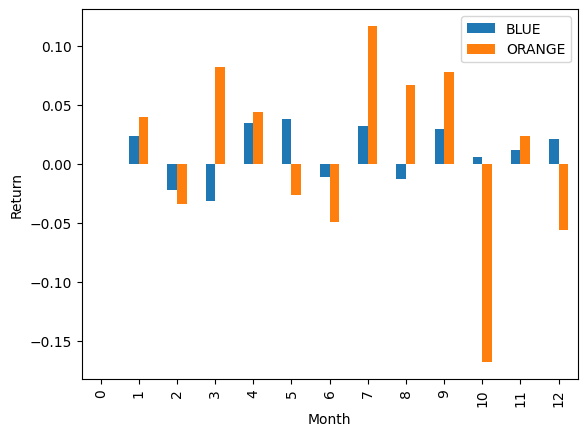

In [13]:
# 수익률(returns)을 막대그래프(bar plot)로 시각화
ax = returns.plot.bar()

# x축 레이블을 'Month'(월)로 설정합니다.
ax.set_xlabel('Month')
# y축 레이블을 'Return'(수익률)로 설정합니다.
ax.set_ylabel('Return')
None

## 2. Compounding Returns (복리 수익률)

- 이제 일련의 12개월 수익률이 있으므로 수익률이 `1+R` 형식이라고 부르는 성장률(Growth Rate)로 표현되는 한 개별 기간 수익률을 곱하여 복리 수익률을 산출할 수 있습니다.

- CAGR(Compound Annual Growth Rate, 연평균 성장률, 연복리 수익률) 계산 공식  

    방법 1. 매(일, 월)별 수익률로 계산
        - 복리 수익률은 각 수익률에 1을 더한 다음 모두 곱하기만 하면 됩니다. 결과는 1+R 형식이므로 1을 빼야 합니다.  
        
        
    방법 2.  시초 가격과 최종 가격, 투자 기간으로 계산
    
$$CAGR = \left(\frac{현재자산}{과거자산}\right)^{\frac{1}{투자기간연수}} - 1$$

$$CAGR = ( 1 + 누적수익률 ) ^ \frac{1}{투자기간연수}- 1$$



두 시리즈의 복리 수익률을 계산해 보겠습니다.

매월의 수익률

In [14]:
# 수익률(returns)에 1을 더합니다.
# 이는 각 수익률에 원금을 더한 값으로, 원금을 포함한 총 수익률을 나타냅니다.
# 예를 들어, 수익률이 0.05이면 1 + 0.05 = 1.05로 계산됩니다.
returns + 1

,BLUE,ORANGE
0,NaN,NaN
1,1.023621,1.039662
2,0.978193,0.966362
3,0.968237,1.082232
4,1.034477,1.044544
5,1.037786,0.973619
6,0.988548,0.950813
7,1.032676,1.117008
8,0.987419,1.067353
9,1.029581,1.078249


방법 1로 복리 수익률 계산

In [15]:
# 수익률(returns)에 1을 더한 후, 전체 기간 동안의 누적 수익률을 계산합니다.
# (returns + 1).prod()는 각 수익률에 1을 더한 값을 모두 곱한 결과를 의미하며, 이는 누적 수익률을 나타냅니다.
# 마지막으로 -1을 하여 원금을 제외한 순수한 누적 수익률을 계산합니다.
# 예를 들어, 연속된 수익률들이 각각 0.05, 0.03, 0.02라면,
# 누적 수익률은 ((1+0.05)*(1+0.03)*(1+0.02)) - 1로 계산됩니다.
(returns + 1).prod() - 1

BLUE      0.123310
ORANGE    0.087167
dtype: float64

위 경우,  평균 수익률은 동일하나 복리 수익률은 차이가 많이 납니다.

방법 2로 복리 수익률 계산

In [16]:
# 'BLUE' 주식의 처음과 마지막 가격을 사용하여 전체 기간 동안의 수익률을 계산합니다.
# prices['BLUE'].values[-1]은 'BLUE' 주식의 마지막 가격을 가져오고,
# prices['BLUE'].values[0]은 'BLUE' 주식의 첫 번째 가격을 가져옵니다.
# (마지막 가격 / 첫 번째 가격) - 1은 전체 기간 동안의 수익률을 계산하는 공식입니다.
(prices['BLUE'].values[-1] / prices['BLUE'].values[0]) - 1

0.1233103448275863

In [17]:
# 'ORANGE' 주식의 처음과 마지막 가격을 사용하여 전체 기간 동안의 수익률을 계산합니다.
# prices['ORANGE'].values[-1]은 'ORANGE' 주식의 마지막 가격을 가져오고,
# prices['ORANGE'].values[0]은 'ORANGE' 주식의 첫 번째 가격을 가져옵니다.
# (마지막 가격 / 첫 번째 가격) - 1은 전체 기간 동안의 수익률을 계산하는 공식입니다.
(prices['ORANGE'].values[-1] / prices['ORANGE'].values[0]) - 1

0.08716697936210127

두 방법의 결과가 동일함을 확인

## 3. Annualizing Returns (연간 수익률)

일정 기간 동안의 수익률을 연간으로 계산하려면 1년의 기간만큼 수익률을 복리화합니다. 

월별 수익 $R_m$을 연간으로 환산하는 공식은 다음과 같습니다.

$$ (1+R_m)^{12} - 1$$

분기별 수익 $R_q$를 연간으로 환산하면 다음을 얻을 수 있습니다.

$$ (1+R_q)^{4} - 1$$

마지막으로 일일 수익 $R_d$를 연간으로 환산하면 다음을 얻을 수 있습니다.

$$ (1+R_d)^{252} - 1$$

예를 들어, 월별 1%, 분기별 4% 및 일일 수익률 0.01%를 연간화하려면 다음을 수행합니다.

In [18]:
rm = 0.01  #월별 1%

(1+rm)**12 - 1  #월별 수익률을 연간으로 환산

0.12682503013196977

In [19]:
rq = 0.04  #분기별 수익률
(1+rq)**4 - 1   #분기별 수익률을 연간으로 환산

0.1698585600000002

### 주식 수익률 (Return) 계산

In [20]:
df = fdr.DataReader("AAPL", start="2022-06-02", end="2022-06-30")
df.drop(["High", "Low", "Open", "Volume", "Adj Close"], axis=1, inplace=True)
df

,Close
2022-06-01,148.710007
2022-06-02,151.210007
2022-06-03,145.380005
2022-06-06,146.139999
2022-06-07,148.710007
2022-06-08,147.960007
2022-06-09,142.639999
2022-06-10,137.130005
2022-06-13,131.880005
2022-06-14,132.759995


### simple return 계산

In [21]:
df['Return'] = df['Close'].pct_change()
df

,Close,Return
2022-06-01,148.710007,NaN
2022-06-02,151.210007,0.016811
2022-06-03,145.380005,-0.038556
2022-06-06,146.139999,0.005228
2022-06-07,148.710007,0.017586
2022-06-08,147.960007,-0.005043
2022-06-09,142.639999,-0.035956
2022-06-10,137.130005,-0.038629
2022-06-13,131.880005,-0.038285
2022-06-14,132.759995,0.006673


### 누적 수익률 (Cumulative Return)
방법 1 : 매일(달)의 수익률로 계산  
누적 수익률 = (1+당일 수익률) * (전일자 누적 수익률)  
$$i_t = (1 + r_t) * i_{t-1}$$

방법 2: 처음, 마지막 가격으로 계산  
누적 수익률 = $\left( \frac{현재가격}{과거가격} \right) - 1$

- 누적 수익률은 단순 덧셈이 아닌 곱셉으로 계산  
 
ex) 10000원이었던 주식이 첫째 달에 10% 상승하고 둘째 달에 20% 상승하게 된다면 누적 수익률은 30%가 아닌, 32%

|기존|10,000원|0%|
|-----|----|----|
|첫째달|11,000원|10%상승|
|둘째달|13,200원|20%상승|
|누적수익률| |32%상승| 

$$(1+0.2)*(1+0.1)-1$$

방법 1 :  (1+당일 수익률) * (전일자 누적 수익률)

In [22]:
# 두 개의 수익률(0.2와 0.1)을 적용하여 누적 수익률을 계산
# 1에 각각의 수익률을 더한 후 곱셈을 통해 두 기간의 수익률을 누적 계산합니다.
# 그 결과에서 -1을 하여 순수 누적 수익률을 구합니다.
# 예를 들어, 첫 번째 기간 수익률이 20%(0.2), 두 번째 기간 수익률이 10%(0.1)일 때,
# (1+0.2)*(1+0.1) - 1을 통해 총 32%의 누적 수익률을 계산합니다.
(1 + 0.2) * (1 + 0.1) - 1

0.32000000000000006

방법 2: (현재가격/과거가격) - 1

In [23]:
(13200 / 10000) - 1

0.32000000000000006

주식의 daily 누적 수익률

In [24]:
# 누적 수익률(Cumulative Return)을 계산하여 'Cum Return' 열에 추가
# (1 + df['Return'])는 각 일일 수익률에 1을 더한 값이며,
# cumprod() 함수는 이 값을 누적 곱하여 전체 기간 동안의 누적 수익률을 계산합니다.
# 마지막으로 -1을 하여 원금을 제외한 순수 누적 수익률을 구합니다.
df['Cum Return'] = (1 + df['Return']).cumprod() - 1

df

,Close,Return,Cum Return
2022-06-01,148.710007,NaN,NaN
2022-06-02,151.210007,0.016811,1.681124e-02
2022-06-03,145.380005,-0.038556,-2.239259e-02
2022-06-06,146.139999,0.005228,-1.728201e-02
2022-06-07,148.710007,0.017586,-2.220446e-16
2022-06-08,147.960007,-0.005043,-5.043373e-03
2022-06-09,142.639999,-0.035956,-4.081775e-02
2022-06-10,137.130005,-0.038629,-7.786969e-02
2022-06-13,131.880005,-0.038285,-1.131733e-01
2022-06-14,132.759995,0.006673,-1.072558e-01


In [25]:
# 'Close' 열의 첫 번째 값과 마지막 값을 사용하여 전체 기간 동안의 수익률을 계산
# df['Close'][-1]은 'Close' 열에서 마지막 값(가장 최신 종가)을 가져오고,
# df['Close'][0]은 'Close' 열에서 첫 번째 값(가장 오래된 종가)을 가져옵니다.
# (마지막 종가 / 첫 번째 종가) - 1은 전체 기간 동안의 수익률을 계산하는 공식입니다.
df['Close'].iloc[-1] / df['Close'].iloc[0] - 1

-0.06374830581891244

## 5. Log Returns (로그 수익률)

$$Log 수익률 = log⁡(나중가격/이전가격)  = log(나중가격) – log(이전가격)$$

$$R_t = \log{(P_{t+1}/P_t)} = \log{P_{t+1}} - \log{P_t}$$

- 자산 가격의 변화 : 100 $\rightarrow$ 130 $\rightarrow$ 100

In [26]:
#simple return의 누적 수익률
(130 - 100) / 100 + (100 - 130) / 130

0.0692307692307692

In [27]:
#log return의 누적 수익률
(np.log(130) - np.log(100)) + (np.log(100) - np.log(130))

0.0

- 일별 로그 수익률

In [28]:
# 로그 수익률(Log Return)을 계산하여 'LogReturn' 열에 추가
# np.log(df['Close'])는 'Close' 열의 로그 값을 계산합니다.
# np.log(df['Close'].shift(1))는 'Close' 열의 전일 종가를 로그로 변환한 값을 계산합니다.
# 두 로그 값의 차이를 통해 로그 수익률을 계산합니다.
df['LogReturn'] = np.log(df['Close']) - np.log(df['Close'].shift(1))

df

,Close,Return,Cum Return,LogReturn
2022-06-01,148.710007,NaN,NaN,NaN
2022-06-02,151.210007,0.016811,1.681124e-02,0.016671
2022-06-03,145.380005,-0.038556,-2.239259e-02,-0.039319
2022-06-06,146.139999,0.005228,-1.728201e-02,0.005214
2022-06-07,148.710007,0.017586,-2.220446e-16,0.017433
2022-06-08,147.960007,-0.005043,-5.043373e-03,-0.005056
2022-06-09,142.639999,-0.035956,-4.081775e-02,-0.036618
2022-06-10,137.130005,-0.038629,-7.786969e-02,-0.039395
2022-06-13,131.880005,-0.038285,-1.131733e-01,-0.039037
2022-06-14,132.759995,0.006673,-1.072558e-01,0.006650


### 누적 로그 수익률
- 로그 수익률은 cumsum() 사용  
- 단순히 daily return 을 더하면 기간 전체의 복리로 계산된 누적 수익률이 계산됨

In [29]:
df = df.round(6)

In [30]:
# 로그 수익률의 누적 합(Cumulative Log Return)을 계산하여 'Cum LogReturn' 열에 추가
# cumsum() 함수는 'LogReturn' 열의 값을 누적하여 더한 결과를 계산합니다.
df['Cum LogReturn'] = df['LogReturn'].cumsum()

df

,Close,Return,Cum Return,LogReturn,Cum LogReturn
2022-06-01,148.710007,NaN,NaN,NaN,NaN
2022-06-02,151.210007,0.016811,0.016811,0.016671,0.016671
2022-06-03,145.380005,-0.038556,-0.022393,-0.039319,-0.022648
2022-06-06,146.139999,0.005228,-0.017282,0.005214,-0.017434
2022-06-07,148.710007,0.017586,-0.000000,0.017433,-0.000001
2022-06-08,147.960007,-0.005043,-0.005043,-0.005056,-0.005057
2022-06-09,142.639999,-0.035956,-0.040818,-0.036618,-0.041675
2022-06-10,137.130005,-0.038629,-0.077870,-0.039395,-0.081070
2022-06-13,131.880005,-0.038285,-0.113173,-0.039037,-0.120107
2022-06-14,132.759995,0.006673,-0.107256,0.006650,-0.113457


- 누적 로그 수익률

$$1 + r = \log{\frac{p_t}{p_0}}$$ 

- 로그 수익률: 복리로 반영  
- 단순 수익률 : 단리로 반영

In [31]:
# 첫 번째 종가와 마지막 종가를 사용하여 전체 기간 동안의 누적 로그 수익률을 계산
# df['Close'][-1]은 'Close' 열에서 마지막 값(가장 최신 종가)을 가져오고,
# df['Close'][0]은 'Close' 열에서 첫 번째 값(가장 오래된 종가)을 가져옵니다.
# (마지막 종가 / 첫 번째 종가)의 로그 값을 계산하여 전체 기간 동안의 누적 로그 수익률을 구합니다.
np.log(df['Close'].iloc[-1] / df['Close'].iloc[0])

-0.06587093458031924

In [32]:
# 첫 번째 종가와 마지막 종가를 사용하여 전체 기간 동안의 수익률을 계산
# df['Close'][-1]은 'Close' 열에서 마지막 값(가장 최신 종가)을 가져오고,
# df['Close'][0]은 'Close' 열에서 첫 번째 값(가장 오래된 종가)을 가져옵니다.
# (마지막 종가 - 첫 번째 종가) / 첫 번째 종가를 통해 전체 기간 동안의 수익률을 계산합니다.
(df['Close'].iloc[-1] - df['Close'].iloc[0]) / df['Close'].iloc[0]

-0.06374830578819078

## 연습 문제

1) 1,000,000 원을 수익률 10%로 10년, 20년, 30년 투자할 때 원금+수익 금액은 ?

In [33]:
# 1,000,000 원을 연 10% 수익률로 투자했을 때 10년, 20년, 30년 후의 결과를 출력
# (1 + 0.1)는 연 10%의 수익률을 의미하며, **10, **20, **30은 각각 10년, 20년, 30년 후를 나타냅니다.
# {:,.0f}는 천 단위 구분 기호를 추가하고 소수점을 표시하지 않도록 설정합니다.

# 10년 후의 투자금 출력
print("{:,.0f}".format(1_000_000 * (1+0.1)**10))

# 20년 후의 투자금 출력
print("{:,.0f}".format(1_000_000 * (1+0.1)**20))

# 30년 후의 투자금 출력
print("{:,.0f}".format(1_000_000 * (1+0.1)**30))

2,593,742
6,727,500
17,449,402


2) 10,000 원을 10 년간 투자했는데 100,000 이 되었다. 누적 수익률과 CAGR 은  ?

In [34]:
# 누적 수익률 계산
# 초기 투자 금액 10,000원 대비 100,000원의 최종 금액을 기준으로 누적 수익률을 계산합니다.
# (최종 금액 / 초기 투자 금액) - 1을 통해 전체 기간 동안의 누적 수익률을 구합니다.
(100_000 / 10_000) - 1

9.0

In [35]:
# CAGR(Compound Annual Growth Rate, 연평균 성장률) 계산
# 초기 투자 금액 10,000원 대비 100,000원의 최종 금액을 기준으로 10년 동안의 연평균 성장률(CAGR)을 계산합니다.
# (최종 금액 / 초기 투자 금액) ** (1 / 기간) - 1을 통해 CAGR을 구합니다.
(100_000 / 10_000) ** (1/10) - 1

0.2589254117941673

3) 애플 주식이 100불에서 10년 뒤 300 불이 되었다면 누적수익률과 CAGR 은 ?

In [36]:
# 누적 수익률
(300 / 100) - 1 

2.0

In [37]:
# CAGR
(300 / 100) ** (1/10) - 1

0.11612317403390437

## 72의 법칙
원금이 2 배가 되는데 걸리는 시간 = 72/CAGR  

ex) 10_000 원을 CAGR 10% 로 운용하면 72/10 = 7.2 년 후 원금이 2 배가 된다.

In [38]:
years = 72/10
print("이자 {:,.0f}원 늘리는데".format(10000 * (1+0.01)**years))
print("{} 년 소요".format(years))

이자 10,743원 늘리는데
7.2 년 소요


CAGR 20% 인 경우 

In [39]:
years = 72/20
print("이자 {:,.0f}원 늘리는데".format(10000 * (1+0.01)**years))
print("{} 년 소요".format(years))

이자 10,365원 늘리는데
3.6 년 소요


CAGR 30% 인 경우 

In [40]:
years = 72/30
print("이자 {:,.0f}원 늘리는데".format(10000 * (1+0.01)**years))
print("{} 년 소요".format(years))

이자 10,242원 늘리는데
2.4 년 소요
